### Student Information
Name: 林奕廷

Student ID: 113062513

GitHub ID: olgi9911

Kaggle name: Oscar Lin

Kaggle private scoreboard snapshot:

![leaderboard.png](./pics/leaderboard.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

## Part 1

Please refer to the master repository.

## Part 2

### Data Preparation

In [1]:
### Begin Assignment Here
import pandas as pd
import numpy as np

In [31]:
# Load the data
data_id = pd.read_csv('dm-2024-isa-5810-lab-2-homework/data_identification.csv')
emotion = pd.read_csv('dm-2024-isa-5810-lab-2-homework/emotion.csv')
tweets = pd.read_json('dm-2024-isa-5810-lab-2-homework/tweets_DM.json', lines=True)  

In [33]:
# Extract tweet_id and text from the _source column
tweets_extracted = tweets['_source'].apply(lambda x: {'tweet_id': x['tweet']['tweet_id'], 'text': x['tweet']['text']})
tweets_df = pd.json_normalize(tweets_extracted)

tweets_df

,tweet_id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...
1867531,0x29d0cb,I swear all this hard work gone pay off one da...
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [34]:
# Merge data_id, tweets_df, and emotion on 'tweet_id'
merged_df = pd.merge(data_id, tweets_df, on='tweet_id', how='left')
merged_df = pd.merge(merged_df, emotion, on='tweet_id', how='left')

merged_df

,tweet_id,identification,text,emotion
0,0x28cc61,test,@Habbo I've seen two separate colours of the e...,NaN
1,0x29e452,train,Huge Respect🖒 @JohnnyVegasReal talking about l...,joy
2,0x2b3819,train,Yoooo we hit all our monthly goals with the ne...,joy
3,0x2db41f,test,@FoxNews @KellyannePolls No serious self respe...,NaN
4,0x2a2acc,train,@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...,trust
...,...,...,...,...
1867530,0x227e25,train,@BBCBreaking Such an inspirational talented pe...,disgust
1867531,0x293813,train,And still #libtards won't get off the guy's ba...,sadness
1867532,0x1e1a7e,train,When you sow #seeds of service or hospitality ...,joy
1867533,0x2156a5,train,@lorettalrose Will you be displaying some <LH>...,trust


In [35]:
train_df = merged_df[merged_df['identification'] == 'train']
test_df = merged_df[merged_df['identification'] == 'test']
test_df = test_df.drop(columns=['emotion'])

In [6]:
train_df

,tweet_id,identification,text,emotion
1,0x29e452,train,Huge Respect🖒 @JohnnyVegasReal talking about l...,joy
2,0x2b3819,train,Yoooo we hit all our monthly goals with the ne...,joy
4,0x2a2acc,train,@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...,trust
5,0x2a8830,train,Come join @ambushman27 on #PUBG while he striv...,joy
6,0x20b21d,train,@fanshixieen2014 Blessings!My #strength little...,anticipation
...,...,...,...,...
1867530,0x227e25,train,@BBCBreaking Such an inspirational talented pe...,disgust
1867531,0x293813,train,And still #libtards won't get off the guy's ba...,sadness
1867532,0x1e1a7e,train,When you sow #seeds of service or hospitality ...,joy
1867533,0x2156a5,train,@lorettalrose Will you be displaying some <LH>...,trust


In [36]:
test_df

,tweet_id,identification,text
0,0x28cc61,test,@Habbo I've seen two separate colours of the e...
3,0x2db41f,test,@FoxNews @KellyannePolls No serious self respe...
15,0x2466f6,test,"Looking for a new car, and it says 1 lady owne..."
23,0x23f9e9,test,@cineworld “only the brave” just out and fount...
31,0x1fb4e1,test,Felt like total dog 💩 going into open gym and ...
...,...,...,...
1867495,0x2c4dc2,test,6 year old walks in astounded. Mum! Look how b...
1867496,0x31be7c,test,Only one week to go until the #inspiringvolunt...
1867500,0x1ca58e,test,"I just got caught up with the manga for ""My He..."
1867515,0x35c8ba,test,Speak only when spoken to and make hot ass mus...


In [8]:
# save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [2]:
# load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

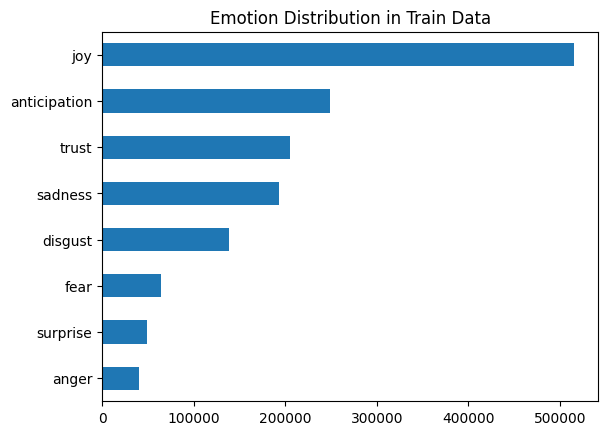

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

train_df['emotion'].value_counts(ascending=True).plot.barh()
plt.title('Emotion Distribution in Train Data')
plt.ylabel(None)
plt.show()

### Preprocessing

In [3]:
import os
import torch
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
torch.cuda.device_count()

1

#### Tokenize & Label Encode

Here I use AutoTokenizer in Hugging Face Transformers to select tokenizer that matches the pretrained model.

In [4]:
from transformers import AutoTokenizer, DataCollatorWithPadding
from sklearn.preprocessing import LabelEncoder

#tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
#tokenizer = AutoTokenizer.from_pretrained("FacebookAI/roberta-base")
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-base")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

encoder = LabelEncoder().fit(train_df['emotion'])
num_labels = len(encoder.classes_)

# Tokenize the dataset
def tokenize(batch):
	#tokenized_text = tokenizer(batch['text'], padding=True, truncation=True)
	tokenized_text = tokenizer(batch['text'], truncation=True)
	batch.update(tokenized_text)
	batch['label'] = encoder.transform(batch['emotion'])
	return batch

2024-11-23 15:55:04.418002: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732348504.442095   26677 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732348504.449457   26677 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-23 15:55:04.471766: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/s113062513/miniconda3/envs/dm/lib/python3.9/site-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The 

In [ ]:
from datasets import Dataset

# Create a dataset from the train dataframe
train_dataset = Dataset.from_pandas(train_df, preserve_index=False)

In [10]:
train_dataset = train_dataset.map(tokenize, batched=True)

Map:   0%|          | 0/1455563 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [11]:
train_dataset

Dataset({
    features: ['tweet_id', 'identification', 'text', 'emotion', 'input_ids', 'token_type_ids', 'attention_mask', 'label'],
    num_rows: 1455563
})

In [12]:
# Save train_dataset to disk
train_dataset.save_to_disk("train_dataset")

Saving the dataset (0/1 shards):   0%|          | 0/1455563 [00:00<?, ? examples/s]

In [6]:
train_dataset = Dataset.load_from_disk("train_dataset")

### Model Training

In [7]:
train_val_dataset = train_dataset.train_test_split(test_size=0.1) #0.2
train_val_dataset

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'identification', 'text', 'emotion', 'input_ids', 'token_type_ids', 'attention_mask', 'label'],
        num_rows: 1310006
    })
    test: Dataset({
        features: ['tweet_id', 'identification', 'text', 'emotion', 'input_ids', 'token_type_ids', 'attention_mask', 'label'],
        num_rows: 145557
    })
})

In [ ]:
#from sklearn.metrics import accuracy_score, f1_score
import evaluate

accuracy_metric = evaluate.load('accuracy')
f1_metric = evaluate.load('f1')

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average='macro')
    return {**accuracy, **f1}

Set up training arguments such as epochs, batch size, fp16, etc.

In [9]:
import torch
import evaluate
from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification

device = 'cuda' if torch.cuda.is_available() else 'cpu'
#model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)
#model = AutoModelForSequenceClassification.from_pretrained("FacebookAI/roberta-base", num_labels=num_labels)
model = AutoModelForSequenceClassification.from_pretrained("microsoft/deberta-v3-base", num_labels=num_labels)

training_args = TrainingArguments(
    output_dir='results_deberta_v3',
    num_train_epochs=3,
    per_device_train_batch_size=32, #32
    per_device_eval_batch_size=32, #32
    eval_strategy='steps',
    eval_steps=10000, #10000
    save_strategy='steps',
    save_steps=10000, #10000
    logging_steps=1000,
    save_total_limit=5,
    load_best_model_at_end=False, #True
    fp16=True,
    torch_compile=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_val_dataset['train'],
    eval_dataset=train_val_dataset['test'],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Detected kernel version 4.15.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


### Training

In [10]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1
10000,1.043600,1.073736,0.616920,0.520065
20000,0.997300,0.984549,0.652727,0.559136
30000,0.961100,0.947641,0.663630,0.579049
40000,0.940600,0.922378,0.665512,0.587842
50000,0.848500,0.921442,0.673028,0.596772
60000,0.843100,0.901535,0.680757,0.604364
70000,0.838200,0.890829,0.684502,0.606844
80000,0.819800,0.878546,0.685175,0.610104
90000,0.707500,0.925113,0.685690,0.613653
100000,0.695800,0.922463,0.687607,0.615049


TrainOutput(global_step=122814, training_loss=0.8497993108560633, metrics={'train_runtime': 11243.2462, 'train_samples_per_second': 349.545, 'train_steps_per_second': 10.923, 'total_flos': 9.854386462421808e+16, 'train_loss': 0.8497993108560633, 'epoch': 3.0})

In [11]:
#trainer.save_model("model_bert_uncased")
#trainer.save_model("model_roberta_base_3epoch")
trainer.save_model("model_deberta_v3_base_3epoch")

In [12]:
pd.DataFrame(trainer.state.log_history)

,loss,grad_norm,learning_rate,epoch,step,eval_loss,eval_accuracy,eval_f1,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,1.4759,3.570094,4.959369e-05,0.024427,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.2633,4.972721,4.918657e-05,0.048854,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.1809,3.994900,4.877986e-05,0.073282,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.1312,3.617017,4.837315e-05,0.097709,4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.1089,3.726475,4.796603e-05,0.122136,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.6781,5.301532,1.163955e-06,2.931262,120000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,NaN,NaN,NaN,2.931262,120000,0.913216,0.691653,0.618912,121.6741,1196.286,37.387,NaN,NaN,NaN,NaN,NaN
132,0.6767,6.411352,7.568355e-07,2.955689,121000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,0.6824,5.851131,3.497158e-07,2.980116,122000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
pd.DataFrame(trainer.state.log_history).to_csv('log_history_deberta_v3_5epoch.csv')

### Prediction

In [14]:
sample_submission = pd.read_csv('dm-2024-isa-5810-lab-2-homework/sampleSubmission.csv')
test_df = test_df.set_index('tweet_id').loc[sample_submission['id']].reset_index()

In [ ]:
def tokenize(batch):
	#tokenized_text = tokenizer(batch['text'], padding=True, truncation=True)
	tokenized_text = tokenizer(batch['text'], truncation=True)
	batch.update(tokenized_text)

	return batch

# Create a dataset from the train dataframe
test_dataset = Dataset.from_pandas(test_df, preserve_index=False)
test_dataset = test_dataset.map(tokenize, batched=True)

In [ ]:
test_dataset.save_to_disk("test_dataset")

In [15]:
test_dataset = Dataset.load_from_disk("test_dataset")

In [16]:
predictions, labels, metrics = trainer.predict(test_dataset)

In [17]:
predicted_labels = np.argmax(predictions, axis=-1)
predicted_emotions = encoder.inverse_transform(predicted_labels)
predicted_emotions

array(['joy', 'joy', 'sadness', ..., 'disgust', 'joy', 'sadness'],
      dtype=object)

### Submission

In [18]:
# Create a new DataFrame for the submission
submission_df = pd.DataFrame({
    'id': sample_submission['id'],
    'emotion': predicted_emotions
})

# Save the DataFrame to a CSV file
#submission_df.to_csv('submission.csv', index=False)
submission_df.to_csv('submission_deberta_v3_3epoch.csv', index=False)

In [12]:
del data_collator
del trainer
del model

torch.cuda.empty_cache()

### Report

I train several pre-trained Transformer models available on Hugging Face including BERT, RoBERTa, and DeBERTa v3. By utilizing the powerful BERT models and tokenizers, I am able to obtain fairly good results without feature engineering steps, significantly reduce the efforts needed.

However, Transformer based models require some amount of GPU memory and take time to train. Results also show that the models tend to overfit the training dataset when train epochs > 3.

To further enhance the performance, one can search for feature engineering techniques that suit BERT models.